In [1]:
import os
import openai

In [2]:
from langchain_openai import OpenAI
from langchain.schema import AIMessage, HumanMessage, SystemMessage

In [42]:
import langchain as lc
from langchain.chat_models import ChatOpenAI

In [4]:
import pandas as pd
import plotly.express as px
from IPython.display import display, Markdown

In [5]:
# to read in the API_key
f = open("C:\\Users\\miche\\Desktop\\machine_learning\\Large language models\\langchain-course-main\\langchain-course-main\\June 2024 Update\\API_key.txt")

In [6]:
# to read in API_key into the system
os.environ['OPENAI_API_KEY'] = f.read()

In [7]:
# to import electric cars dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/Electric_Vehicle_Population_Data.csv')

In [8]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


In [9]:
# to check the data types of all variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         191407 non-null  object 
 1   County                                             191403 non-null  object 
 2   City                                               191403 non-null  object 
 3   State                                              191407 non-null  object 
 4   Postal Code                                        191403 non-null  float64
 5   Model Year                                         191407 non-null  int64  
 6   Make                                               191407 non-null  object 
 7   Model                                              191407 non-null  object 
 8   Electric Vehicle Type                              191407 non-null  object

In [10]:
# to display a description of the numeric columns
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,191403.000000,191407.000000,191407.000000,191407.000000,190993.000000,1.914070e+05,1.914030e+05
mean,98177.823603,2020.732335,55.657442,994.773258,29.016880,2.237202e+08,5.297759e+10
std,2392.808886,2.990487,90.151930,8050.523372,14.909417,7.398058e+07,1.573588e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.861622e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,2.328176e+08,5.303303e+10
75%,98371.000000,2023.000000,72.000000,0.000000,42.000000,2.589708e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [11]:
# to display a description all 'object' columns
df.select_dtypes("object").describe()

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
count,191407,191403,191403,191407,191407,191407,191407,191407,191399,191403
unique,11487,197,744,46,42,147,2,3,891,75
top,7SAYGDEE6P,King,Seattle,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.1207376 47.6705374),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
freq,1236,99076,31436,190993,84670,39521,149687,102133,4858,70546


In [12]:
## Asking GPT a Question
# - system message describes the behavior of the AI assistant, the role that GPT will play
# - user message describe what you want the AI assistant to say

In [13]:
# Define the system message. Assign to system_msg_test
system_msg_test = """You are a helpful assistant who understands data science.
 You write in a clear language that a ten year old can understand.
 You keep your answers brief."""

In [14]:
# Define the user message. Assign to user_msg_test.
user_msg_test = "Tell me some uses of GPT for data analysis."

In [15]:
# to create a message list from the system and user message. Assign to msgs_test
msgs_test = [
    {"role": "system", "content": system_msg_test},
    {"role": "user", "content": user_msg_test}
]

In [16]:
# to send messages to GPT. Assign to rsps_test
rsps_test = openai.chat.completions.create(
    model = "gpt-3.5-turbo",
    messages = msgs_test
)

In [17]:
# to print the whole GPT response
print("The whole response")
print('\n')
print(rsps_test)

The whole response


ChatCompletion(id='chatcmpl-9gPTzfOhVI55LAoVl0Ig8Aggzpvag', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='GPT can help analyze and summarize large amounts of text data, generate responses to customer inquiries, and assist in creating natural language processing models. It can also be used for language translation and sentiment analysis.', role='assistant', function_call=None, tool_calls=None))], created=1719894759, model='gpt-3.5-turbo-0125', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=40, prompt_tokens=52, total_tokens=92))


In [18]:
# to print only the response's content
print("Just the response's content")
print('\n')
print(rsps_test.choices[0].message.content)

Just the response's content


GPT can help analyze and summarize large amounts of text data, generate responses to customer inquiries, and assist in creating natural language processing models. It can also be used for language translation and sentiment analysis.


In [19]:
# to create a task for the AI. Assign to suggest_questions
suggest_questions = "Suggest some data analysis questions that could be answered with this dataset."

In [20]:
# A description of the dataset
dataset_description = """
You have a dataset about electric cars registered in Washington state, USA in 2020. It is available as a pandas DataFrame named `df`.

Each row in the dataset represents the count of the number of cars registered within a city, for a particular model.

The dataset contains the following columns.

- `City` (character): The city in which the registered owner resides.
- `County` (character): The county in which the registered owner resides.
- `Model_Year` (integer): The [model year](https://en.wikipedia.org/wiki/Model_year#United_States_and_Canada) of the car.
- `Make` (character): The manufacturer of the car.
- `Model` (character): The model of the car.
- `Electric_Vehicle_Type` (character): Either "Plug-in Hybrid Electric Vehicle (PHEV)" or "Battery Electric Vehicle (BEV)".
- `n_cars` (integer): The count of the number of vehicles registered.
"""

In [21]:
# Concatenate the dataset description and the request. Assign to msgs_suggest_questions.
msgs_suggest_questions = [
    SystemMessage(content ="You are a data analysis expert."),
    HumanMessage(content =f"{dataset_description}\n\n{suggest_questions}")
]

In [43]:
# Create a ChatOpenAI object. Assign to chat.
chat = ChatOpenAI()

In [44]:
# Pass your message to GPT. Assign to rsps_suggest_questions.
rsps_suggest_questions = chat.invoke(msgs_suggest_questions)

In [45]:
# Print the response
print("The whole response\n")
print(rsps_suggest_questions)

The whole response

content='Here are some data analysis questions that could be explored using the dataset of electric cars registered in Washington state, USA in 2020:\n\n1. What is the distribution of electric vehicle types (PHEV vs BEV) in the dataset?\n2. Which city had the highest number of electric cars registered in 2020?\n3. What are the most popular electric car models among the registered vehicles?\n4. How does the distribution of electric cars vary across different counties in Washington state?\n5. Are there any trends in the registration of electric cars based on the model year?\n6. Which electric vehicle manufacturers had the highest number of cars registered in Washington state in 2020?\n7. Is there a difference in the number of registered electric cars between urban and rural areas?\n8. Can we identify any correlations between the number of registered electric cars and factors such as income levels or environmental policies in different cities or counties?\n\nThese ques

In [46]:
# Print just the response's content
print("Just the response's content\n")
print(rsps_suggest_questions.content)

Just the response's content

Here are some data analysis questions that could be explored using the dataset of electric cars registered in Washington state, USA in 2020:

1. What is the distribution of electric vehicle types (PHEV vs BEV) in the dataset?
2. Which city had the highest number of electric cars registered in 2020?
3. What are the most popular electric car models among the registered vehicles?
4. How does the distribution of electric cars vary across different counties in Washington state?
5. Are there any trends in the registration of electric cars based on the model year?
6. Which electric vehicle manufacturers had the highest number of cars registered in Washington state in 2020?
7. Is there a difference in the number of registered electric cars between urban and rural areas?
8. Can we identify any correlations between the number of registered electric cars and factors such as income levels or environmental policies in different cities or counties?

These questions can h

In [47]:
# Print the type of the response
print("The type of the response\n")
print(type(rsps_suggest_questions)) # it is an AI message, computer generated content

The type of the response

<class 'langchain_core.messages.ai.AIMessage'>


In [27]:
## Hold a conversation with GPT

In [48]:
# Append the response and a new message to the previous messages. 
# to add 2 lists together and assign to msgs_python_top_models.
msgs_python_top_models = msgs_suggest_questions + [
    rsps_suggest_questions,
    HumanMessage(content = "Write Python code to find the make/model combinations of electric car in Washington state")
]

In [49]:
# Pass your message to GPT. Assign to rsps_python_top_models.
rsps_python_top_models = chat.invoke(msgs_python_top_models)

In [50]:
# Display the response's Markdown content
display(Markdown(rsps_python_top_models.content))

You can find the make/model combinations of electric cars in Washington state by grouping the DataFrame by the 'Make' and 'Model' columns and counting the number of cars for each combination. Here's the Python code to achieve this:

```python
# Grouping the DataFrame by 'Make' and 'Model' columns and summing the 'n_cars' for each combination
make_model_counts = df.groupby(['Make', 'Model'])['n_cars'].sum().reset_index()

# Displaying the make/model combinations along with the total count of registered cars for each combination
print(make_model_counts)
```

This code will provide you with a DataFrame that shows the make/model combinations of electric cars registered in Washington state along with the total count of cars for each combination.

In [51]:
# to cut and paste the code generated from ChatGPT
# Filter the DataFrame to include only electric cars
electric_cars_df = df[df['Electric Vehicle Type'].str.contains('Electric Vehicle')]

# to remove all duplicated values
make_model_combinations = electric_cars_df[['Make', 'Model']].drop_duplicates()

# group the data by make and model and count the number of occurences
make_model_combinations = electric_cars_df.groupby(["Make","Model"]).size().reset_index(name ="count")

# Sort the combinations by count in descending order
make_model_combinations = make_model_combinations.sort_values("count", ascending=False)

# Display the unique make/model combinations
print(make_model_combinations)

          Make        Model  count
129      TESLA      MODEL Y  39521
126      TESLA      MODEL 3  30978
109     NISSAN         LEAF  13439
127      TESLA      MODEL S   7869
37   CHEVROLET      BOLT EV   6444
..         ...          ...    ...
111    PORSCHE          918      1
38   CHEVROLET  S-10 PICKUP      1
22         BMW         750E      1
15     BENTLEY     BENTAYGA      1
0        ACURA          ZDX      1

[147 rows x 3 columns]


In [32]:
# when temperature = 0, it means minimal randomness (to make it easier to reproduce results)
# when temperature = 2, it means maximum randomness (often gives weird responses)
# if you use OpenAI API, the default = 1
# LangChain = 0.7

In [52]:
# Create a ChatOpenAI object. Assign to chat.
chat0 = ChatOpenAI(temperature=0)

In [53]:
# Pass your message to GPT. Assign to rsps_suggest_questions.
msgs_python_plot = msgs_python_top_models + [
    rsps_python_top_models,
    HumanMessage(content="Write some python code to to draw a bar plot of the total count of electric cars by model year, with bars colored by electric vehicle type. Use the Plotly Express package")
]

In [54]:
# to pass message to GPT and assign to rsps_python_top_models
rsps_python_plot = chat0.invoke(msgs_python_plot)

In [55]:
# to display the response's Markdown content
display(Markdown(rsps_python_plot.content))

To draw a bar plot of the total count of electric cars by model year, with bars colored by electric vehicle type using Plotly Express, you can use the following Python code:

```python
import plotly.express as px

# Grouping the DataFrame by 'Model_Year' and 'Electric_Vehicle_Type' columns and summing the 'n_cars' for each combination
model_year_counts = df.groupby(['Model_Year', 'Electric_Vehicle_Type'])['n_cars'].sum().reset_index()

# Creating the bar plot using Plotly Express
fig = px.bar(model_year_counts, x='Model_Year', y='n_cars', color='Electric_Vehicle_Type',
             labels={'n_cars': 'Total Count of Electric Cars', 'Model_Year': 'Model Year'},
             title='Total Count of Electric Cars by Model Year (Colored by Electric Vehicle Type)')

# Displaying the plot
fig.show()
```

This code will generate a bar plot using Plotly Express that shows the total count of electric cars by model year, with bars colored by electric vehicle type. The x-axis represents the model year, the y-axis represents the total count of electric cars, and the bars are colored based on the electric vehicle type (PHEV or BEV).

In [56]:
# to call GPT again with the same message list and display the response
rsps_python_plot1 = chat0.invoke(msgs_python_plot)

In [57]:
display(Markdown(rsps_python_plot1.content))

To draw a bar plot of the total count of electric cars by model year, with bars colored by electric vehicle type using Plotly Express, you can use the following Python code:

```python
import plotly.express as px

# Grouping the DataFrame by 'Model_Year' and 'Electric_Vehicle_Type' columns and summing the 'n_cars' for each combination
model_year_counts = df.groupby(['Model_Year', 'Electric_Vehicle_Type'])['n_cars'].sum().reset_index()

# Creating the bar plot using Plotly Express
fig = px.bar(model_year_counts, x='Model_Year', y='n_cars', color='Electric_Vehicle_Type',
             labels={'n_cars': 'Total Count of Electric Cars', 'Model_Year': 'Model Year'},
             title='Total Count of Electric Cars by Model Year (Colored by Electric Vehicle Type)')

# Displaying the plot
fig.show()
```

This code will generate a bar plot using Plotly Express that shows the total count of electric cars by model year, with bars colored by electric vehicle type (PHEV vs BEV). The plot will provide a visual representation of the distribution of electric cars by model year and electric vehicle type in Washington state.

In [58]:
# to Copy and Paste ChatGPT 3.5 instructions into Jupyter notebook and run the codes
# to change all small letter to Capital letters when labelling axis and remove 'n_cars' always double check codes written by GPT
import plotly.express as px

In [59]:
# Filter the DataFrame to include only electric vehicles
electric_cars = df[df['Electric Vehicle Type'].str.contains('Electric Vehicle')]

# Group by model year and electric vehicle type to get the total count of electric cars
grouped_data = electric_cars.groupby(['Model Year', 'Electric Vehicle Type']).size().reset_index(name="count")

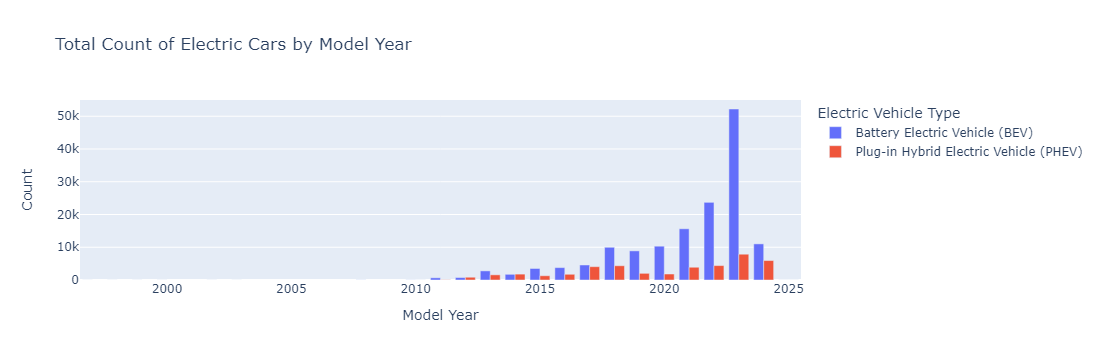

In [60]:
# Draw a bar plot using Plotly Express
fig = px.bar(grouped_data, x='Model Year', y='count', color='Electric Vehicle Type',
             labels={'count': 'Count', 'model year': 'Model Year'},
             title='Total Count of Electric Cars by Model Year',
             barmode='group')

fig.show()